<h3>Import Libraries </h3>


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
from sklearn.tree import export_text


<h3>Loading the dataset<h3>

In [42]:
dataframe = pd.read_csv('Heart_attack_pred.csv')
dataframe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,NaN
1,53.0,1.0,0.0,140.0,203.0,1,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,51.0,1.0,2.0,94.0,227.0,0,1.0,154.0,1.0,0.0,2.0,1.0,3.0,1.0
1121,44.0,1.0,0.0,110.0,197.0,0,0.0,177.0,0.0,0.0,2.0,1.0,2.0,0.0
1122,57.0,1.0,0.0,140.0,192.0,0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
1123,59.0,1.0,0.0,135.0,234.0,0,1.0,161.0,0.0,0.5,1.0,0.0,3.0,1.0


### Data Exploration

In [43]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1121.000000,1122.000000,1123.000000,1122.000000,1121.000000,1125.000000,1119.000000,1124.000000,1123.000000,1123.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,54.355932,0.698752,0.940338,131.405526,245.621766,0.144889,0.523682,149.182384,0.337489,1.076135,1.383586,0.754683,2.334523,0.506690
std,9.073754,0.459005,1.034607,17.563965,51.012163,0.352145,0.529220,22.971305,0.473064,1.181279,0.616049,1.031442,0.620738,0.500178
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1121 non-null   float64
 1   sex       1122 non-null   float64
 2   cp        1123 non-null   float64
 3   trestbps  1122 non-null   float64
 4   chol      1121 non-null   float64
 5   fbs       1125 non-null   int64  
 6   restecg   1119 non-null   float64
 7   thalach   1124 non-null   float64
 8   exang     1123 non-null   float64
 9   oldpeak   1123 non-null   float64
 10  slope     1121 non-null   float64
 11  ca        1121 non-null   float64
 12  thal      1121 non-null   float64
 13  target    1121 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 123.2 KB


In [45]:
dataframe.shape

(1125, 14)

In [46]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,NaN
1,53.0,1.0,0.0,140.0,203.0,1,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0


In [47]:
dataframe.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1120,51.0,1.0,2.0,94.0,227.0,0,1.0,154.0,1.0,0.0,2.0,1.0,3.0,1.0
1121,44.0,1.0,0.0,110.0,197.0,0,0.0,177.0,0.0,0.0,2.0,1.0,2.0,0.0
1122,57.0,1.0,0.0,140.0,192.0,0,1.0,148.0,0.0,0.4,1.0,0.0,1.0,1.0
1123,59.0,1.0,0.0,135.0,234.0,0,1.0,161.0,0.0,0.5,1.0,0.0,3.0,1.0
1124,67.0,1.0,0.0,160.0,286.0,0,0.0,108.0,1.0,1.5,1.0,3.0,2.0,0.0


### Data Pre Processing

In [48]:
#checking and counting null values
dataframe.isna().sum()

age         4
sex         3
cp          2
trestbps    3
chol        4
fbs         0
restecg     6
thalach     1
exang       2
oldpeak     2
slope       4
ca          4
thal        4
target      4
dtype: int64

In [49]:
#droping null values
dataframe.dropna(inplace = True)

In [50]:
#Rechecking null values to confirm
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
#checking duplicated rows
dataframe.duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
1120     True
1121     True
1122     True
1123     True
1124     True
Length: 1082, dtype: bool

In [52]:
#Droping duplicated values
dataframe = dataframe.drop_duplicates()


In [53]:
dataframe.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
739    False
771    False
807    False
843    False
878    False
Length: 302, dtype: bool

In [54]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53.0,1.0,0.0,140.0,203.0,1,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
5,58.0,0.0,0.0,100.0,248.0,0,0.0,122.0,0.0,1.0,1.0,0.0,2.0,1.0


### Data Visualization

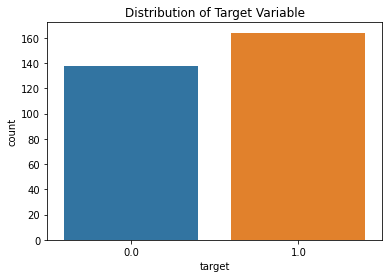

In [55]:
# Visualize the distribution of the target variable
sns.countplot(x='target', data=dataframe)
plt.title('Distribution of Target Variable')
plt.show()

In [56]:
average_age_ = dataframe.groupby('target')['age'].mean()
average_age_

target
0.0    56.601449
1.0    52.585366
Name: age, dtype: float64

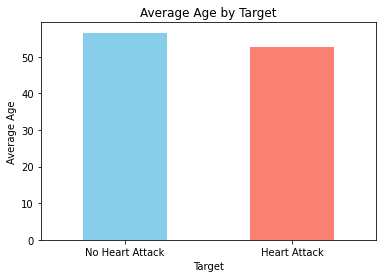

In [57]:
average_age_.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Age by Target')
plt.xlabel('Target')
plt.ylabel('Average Age')
plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack'], rotation=0)
plt.show()


In [58]:
# Calculate average blood pressure by target
average_bp_ = dataframe.groupby('target')['trestbps'].mean()
average_bp_

target
0.0    134.398551
1.0    129.250000
Name: trestbps, dtype: float64

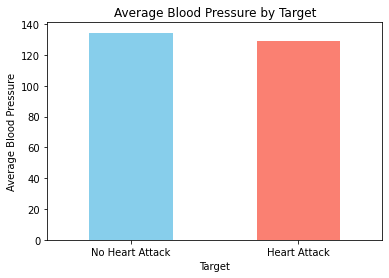

In [59]:
# Plotting bar graph
average_bp_.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Average Blood Pressure by Target')
plt.xlabel('Target')
plt.ylabel('Average Blood Pressure')
plt.xticks([0, 1], ['No Heart Attack', 'Heart Attack'], rotation=0)
plt.show()

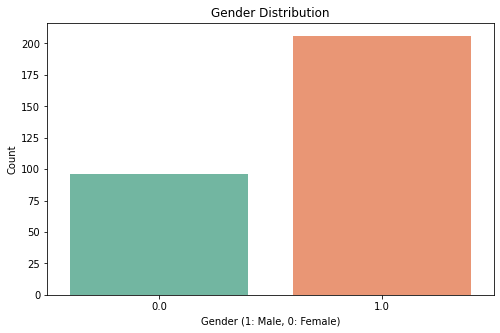

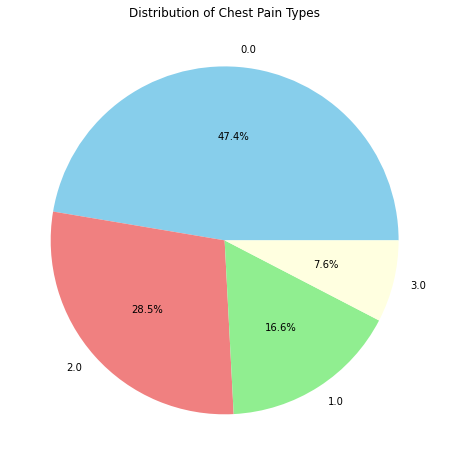

In [60]:
# Bar Chart for Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=dataframe, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender (1: Male, 0: Female)')
plt.ylabel('Count')
plt.show()

# Pie Chart for Chest Pain Types
plt.figure(figsize=(8, 8))
dataframe['cp'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Chest Pain Types')
plt.ylabel('')
plt.show()

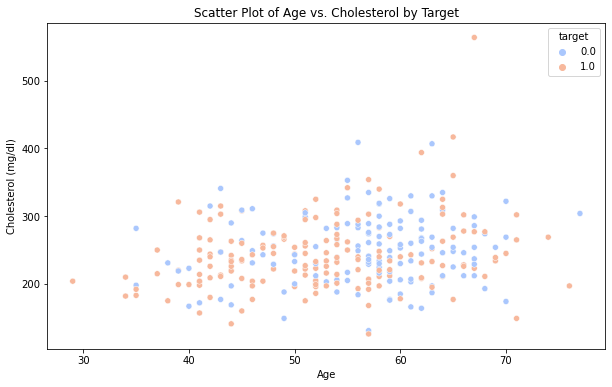

In [61]:
# Scatter Plot for Age vs. Cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', data=dataframe, hue='target', palette='coolwarm')
plt.title('Scatter Plot of Age vs. Cholesterol by Target')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

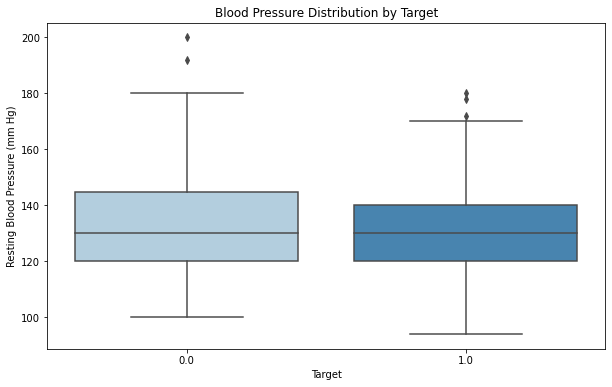

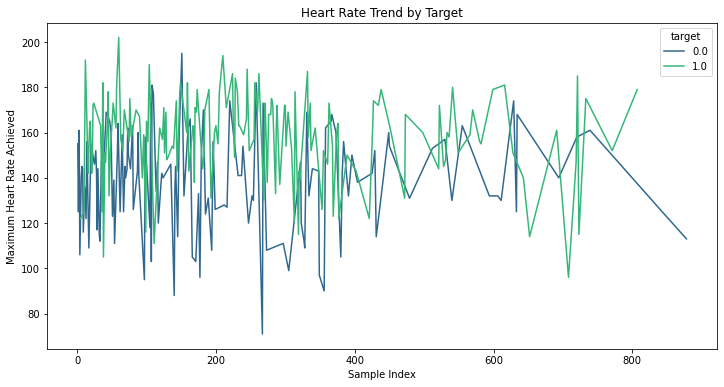

In [62]:
# Boxplot for Blood Pressure by Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=dataframe, palette='Blues')
plt.title('Blood Pressure Distribution by Target')
plt.xlabel('Target')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

# Line Chart for Heart Rate Trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=dataframe.index, y='thalach', data=dataframe, hue='target', palette='viridis')
plt.title('Heart Rate Trend by Target')
plt.xlabel('Sample Index')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

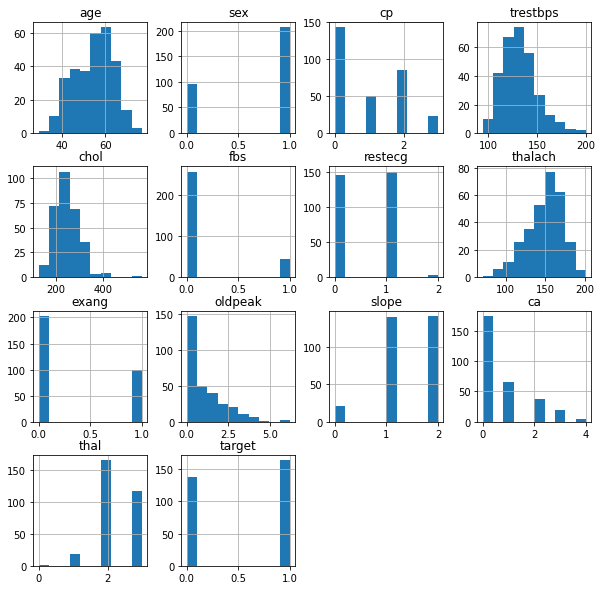

In [63]:
dataframe.hist(figsize = (10,10))

<AxesSubplot:>

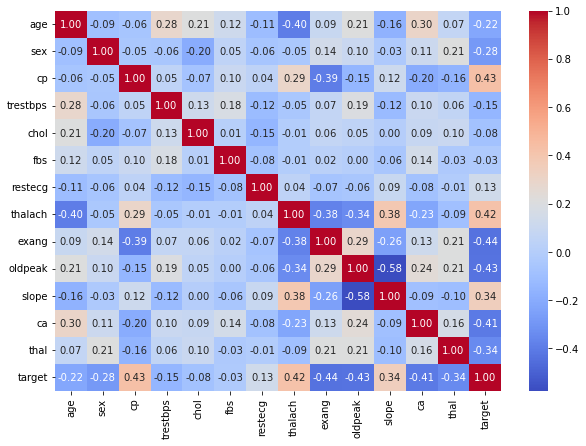

In [64]:
plt.figure(figsize=(10,7))
sns.heatmap(dataframe.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### Features Engineering

In [65]:
dataframe['sex'][dataframe['sex']==1] ='Male'
dataframe['sex'][dataframe['sex']==0] ='Female'

dataframe['cp'][dataframe['cp']==0] ='Typical Angina'
dataframe['cp'][dataframe['cp']==1] ='Atypical Angina'
dataframe['cp'][dataframe['cp']==2] ='Non-anginal Pain'
dataframe['cp'][dataframe['cp']==3] ='Asymptomatic'

dataframe['fbs'][dataframe['fbs']==0] ='Less than 120mg/dl'
dataframe['fbs'][dataframe['fbs']==1] ='More than 120mg/dl'

dataframe['exang'][dataframe['exang']==0] ='No'
dataframe['exang'][dataframe['exang']==1] ='Yes'

dataframe['slope'][dataframe['slope']==0] ='Upsloping'
dataframe['slope'][dataframe['slope']==1] ='Flat'
dataframe['slope'][dataframe['slope']==2] ='Downsloping'

dataframe['thal'][dataframe['thal']==1] ='Normal'
dataframe['thal'][dataframe['thal']==2] ='Fixed defect'
dataframe['thal'][dataframe['thal']==3] ='Reversable defect'

for i in range(10):
    categorical_columns = ['sex', 'cp', 'fbs','slope', 'exang', 'thal']
    dataframe_encoded = pd.get_dummies(dataframe, columns=categorical_columns, drop_first=True)

### One-hot encoding

In [66]:
# Apply one-hot encoding to the specified columns
dumm_dataframe = pd.get_dummies(dataframe, columns=categorical_columns, drop_first=True)
dumm_dataframe.head()

,age,trestbps,chol,restecg,thalach,oldpeak,ca,target,sex_Male,cp_Atypical Angina,cp_Non-anginal Pain,cp_Typical Angina,fbs_More than 120mg/dl,slope_Flat,slope_Upsloping,exang_Yes,thal_Fixed defect,thal_Normal,thal_Reversable defect
1,53.0,140.0,203.0,0.0,155.0,3.1,0.0,0.0,1,0,0,1,1,0,1,1,0,0,1
2,70.0,145.0,174.0,1.0,125.0,2.6,0.0,0.0,1,0,0,1,0,0,1,1,0,0,1
3,61.0,148.0,203.0,1.0,161.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,1
4,62.0,138.0,294.0,1.0,106.0,1.9,3.0,0.0,0,0,0,1,1,1,0,0,1,0,0
5,58.0,100.0,248.0,0.0,122.0,1.0,0.0,1.0,0,0,0,1,0,1,0,0,1,0,0


## Data Trainning

### Defining Attributes and target variable

In [67]:
X = dumm_dataframe.drop('target', axis=1)
y = dumm_dataframe['target']

### Split data into train and test set

In [68]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training data

In [69]:
# Train the Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [70]:
# Make predictions on the test set
y_pred = decision_tree_classifier.predict(X_test)
y_pred

array([1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0.])

In [71]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7213114754098361


### Hyperparameter Tuning

Iteration 1 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 2}
Iteration 1 - Cross-Validated Score: 0.7156989247311828


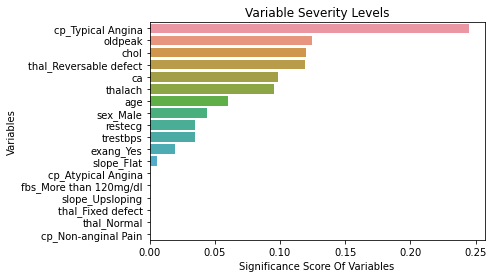

Iteration 2 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2}
Iteration 2 - Cross-Validated Score: 0.7617204301075269


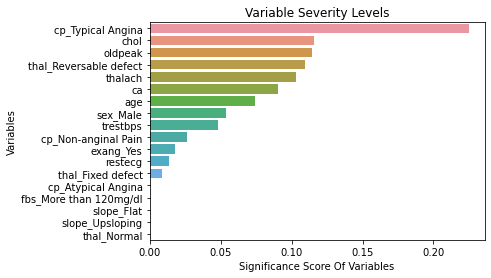

Iteration 3 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 2}
Iteration 3 - Cross-Validated Score: 0.7353763440860215


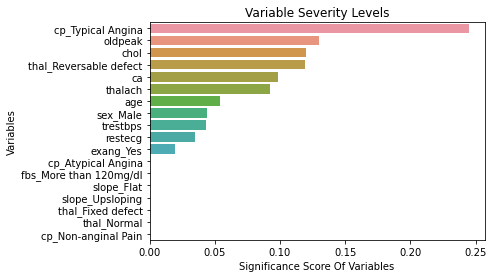

Iteration 4 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}
Iteration 4 - Cross-Validated Score: 0.7289247311827957


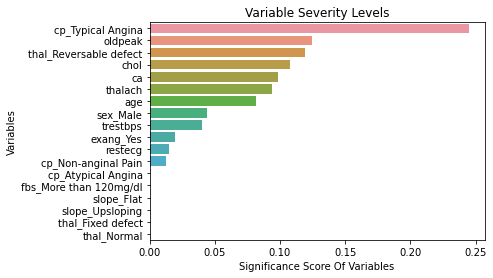

Iteration 5 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 2}
Iteration 5 - Cross-Validated Score: 0.7453763440860216


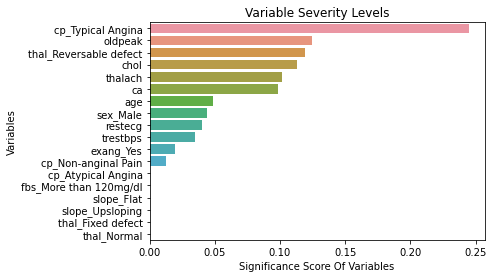

Iteration 6 - Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
Iteration 6 - Cross-Validated Score: 0.7518279569892473


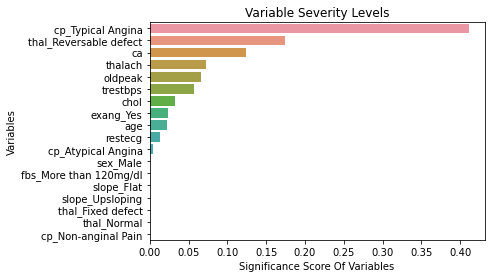

Iteration 7 - Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Iteration 7 - Cross-Validated Score: 0.7283870967741936


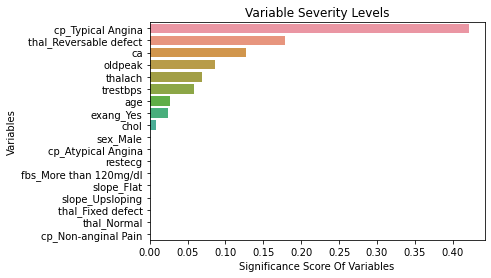

Iteration 8 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 2}
Iteration 8 - Cross-Validated Score: 0.7388172043010752


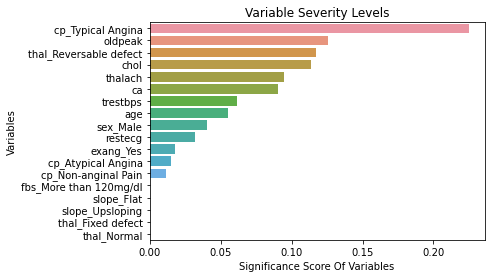

Iteration 9 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5}
Iteration 9 - Cross-Validated Score: 0.7387096774193549


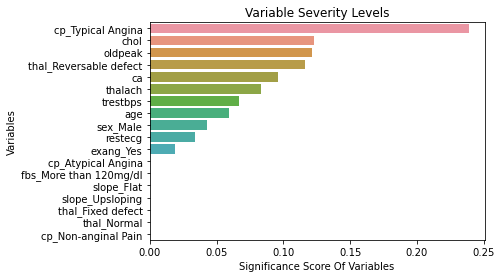

Iteration 10 - Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Iteration 10 - Cross-Validated Score: 0.7786021505376345


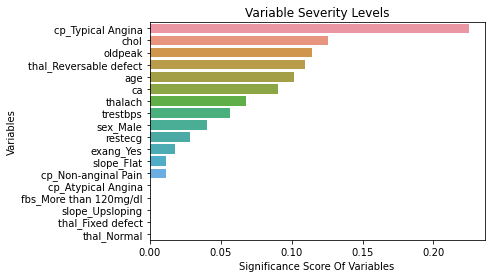

In [72]:
#hyperparameter tuning

for i in range(10):

    #HyperparameterTunning
    param_dict = {
       'criterion': ['gini', 'entropy'],
        'max_depth': [10,20,30,35],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]

    }

    grid=GridSearchCV(decision_tree_classifier,param_grid=param_dict,cv=10,n_jobs=-1)
    grid.fit(X_train, y_train)
    

    print(f"Iteration {i+1} - Best Hyperparameters:", grid.best_params_)
    decision_tree_tuned = DecisionTreeClassifier(**grid.best_params_).fit(X_train, y_train)

    # Cross-validated score
    cv_score = cross_val_score(decision_tree_tuned, X, y, cv=10).mean()
    print(f"Iteration {i+1} - Cross-Validated Score:", cv_score)
    
    feature_importance = pd.Series(decision_tree_tuned.feature_importances_, index=X.columns).sort_values(ascending=False)
   


    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.xlabel('Significance Score Of Variables')
    plt.ylabel('Variables')
    plt.title("Variable Severity Levels")
    plt.show()

### Confusion Matrix

In [73]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[18  7]
 [10 26]]


### Classification Report


Model Evaluation

In [74]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.72      0.68        25
         1.0       0.79      0.72      0.75        36

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



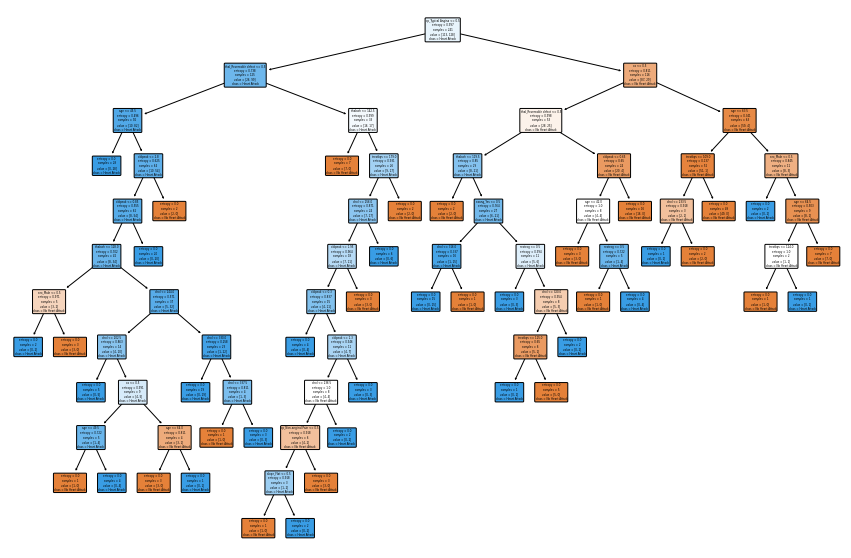

In [75]:
plt.figure(figsize=(15, 10))
plot_tree(decision_tree_tuned, filled=True, feature_names=X.columns, class_names=['No Heart Attack', 'Heart Attack'], rounded=True)
plt.show()

### Heart Attack Prediction 

In [76]:
X_test['Heart Attack'] = y_pred
X_test.head()

,age,trestbps,chol,restecg,thalach,oldpeak,ca,sex_Male,cp_Atypical Angina,cp_Non-anginal Pain,cp_Typical Angina,fbs_More than 120mg/dl,slope_Flat,slope_Upsloping,exang_Yes,thal_Fixed defect,thal_Normal,thal_Reversable defect,Heart Attack
262,48.0,122.0,222.0,0.0,186.0,0.0,0.0,1,0,0,1,0,0,0,0,1,0,0,1.0
366,58.0,112.0,230.0,0.0,165.0,2.5,1.0,1,0,1,0,0,1,0,0,0,0,1,0.0
144,47.0,112.0,204.0,1.0,143.0,0.1,0.0,1,0,0,1,0,0,0,0,1,0,0,1.0
426,54.0,160.0,201.0,1.0,163.0,0.0,1.0,0,0,1,0,0,0,0,0,1,0,0,0.0
68,37.0,120.0,215.0,1.0,170.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0,1.0
